In [1]:
import numpy as np 
import pandas as pd 

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pip install scikit-learn-extra

Note: you may need to restart the kernel to use updated packages.


In [2]:
covid=pd.read_csv('covid_1.csv')

In [5]:
covid.columns

Index(['sex', 'patient_type', 'intubated', 'pneumonia', 'age', 'pregnant',
       'diabetes', 'copd', 'asthma', 'immunosuppression', 'hypertension',
       'other_diseases', 'cardiovascular', 'obesity', 'chronic_kidney_failure',
       'smoker', 'another_case', 'outcome', 'icu', 'death_date'],
      dtype='object')

In [6]:
covid.shape

(95839, 20)

In [7]:
covid.dtypes

sex                        int64
patient_type               int64
intubated                  int64
pneumonia                  int64
age                        int64
pregnant                   int64
diabetes                   int64
copd                       int64
asthma                     int64
immunosuppression          int64
hypertension               int64
other_diseases             int64
cardiovascular             int64
obesity                    int64
chronic_kidney_failure     int64
smoker                     int64
another_case               int64
outcome                    int64
icu                        int64
death_date                object
dtype: object

<H2>Data Preprocessing</H2>

<H5>First of all, we will look for the null/missing values. We found no missing values in the data.</H5>

In [8]:
covid.isnull().sum()

sex                       0
patient_type              0
intubated                 0
pneumonia                 0
age                       0
pregnant                  0
diabetes                  0
copd                      0
asthma                    0
immunosuppression         0
hypertension              0
other_diseases            0
cardiovascular            0
obesity                   0
chronic_kidney_failure    0
smoker                    0
another_case              0
outcome                   0
icu                       0
death_date                0
dtype: int64

In [48]:
covid = covid.drop('death_date', axis = 1)

<H2>Standardize Data</H2>

In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
covid_std = scaler.fit_transform(covid)

<H2>PCA</H2>
<p>we will apply PCA for dimensionality reduction and important feature selection</p>

In [56]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(covid_std)

PCA()

In [57]:
pca.explained_variance_ratio_

array([4.60355448e-01, 1.74476783e-01, 1.02482987e-01, 5.28462610e-02,
       5.09977634e-02, 4.69696306e-02, 4.52610006e-02, 1.59872647e-02,
       1.05892192e-02, 8.54348363e-03, 7.15690893e-03, 6.04432197e-03,
       5.07444347e-03, 4.66755419e-03, 4.31872165e-03, 3.92365249e-03,
       2.55316083e-04, 4.75013780e-05, 1.73820701e-06])

Text(0, 0.5, 'Cumulative explained variance')

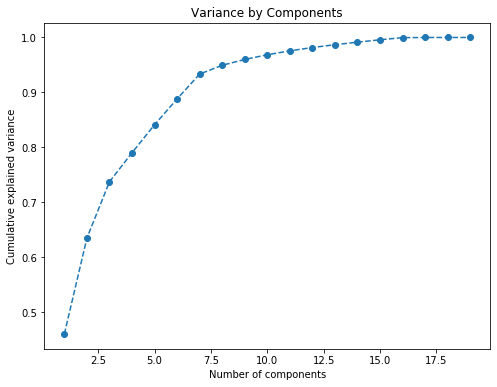

In [59]:
plt.figure(figsize = (8,6))
plt.plot(range(1,20), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Variance by Components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')


It's advisable to preserve 80% of variance. So by looking at the graph, we decide to keep 7 components

In [97]:
pca = PCA(n_components = 6)

In [98]:
pca.fit(covid_std)

PCA(n_components=6)

In [99]:
pca.transform(covid_std)

array([[ 0.09123853, -0.11855312,  0.20091249,  0.1659848 ,  0.78296381,
        -0.64533965],
       [-0.800369  ,  3.08841035,  0.4673573 , -1.05228366, -0.3068357 ,
         0.72598464],
       [-0.25311097,  3.1407079 ,  0.25319517, -0.99041632, -0.31536896,
         0.71826028],
       ...,
       [ 0.13267379, -1.01189711,  0.0650151 ,  0.02167683,  0.63429865,
        -0.60460382],
       [ 0.14041301, -1.08566928,  0.13978763, -0.139779  ,  0.65671296,
        -0.59778367],
       [-0.81702742,  2.67890924, -0.13659572, -0.22351098, -0.80408541,
         0.48630713]])

In [100]:
scores_pca = pca.transform(covid_std)

<H2>K means clustering</H2>
<p>The PCA scores that we got in the above step will be incorporated into the K means algorithm
<br>In order to calculate the optimal number of clusters for K mean algorithm, we will undergo three steps.
    <br>1. We will run the algorithm for a number of clusters.
    <br>2. Then we will determine WCSS-Within sum-of-square values. We will choose the value of k for where wcss starts to diminish.
     <br>3. Through using Elbow method we will decide which k value is the best for our dataset.

In [101]:
from sklearn.cluster import KMeans

wcss = []

#we will try for a range of 20 clusters 
for i in range(1,21):
    kmeans_pca = KMeans(n_clusters = i, init='k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

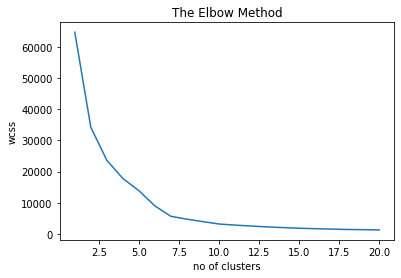

In [102]:
plt.plot(range(1,21), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

As we can see from the graph that the elbow is at k=7. So the optimal value found for k is 7.

In [103]:
kmeans = KMeans(n_clusters= 7, init='k-means++', random_state=0)
#ykmeans= kmeansmodel.fit_predict(X)

In [104]:
final = kmeans.fit(scores_pca)

In [105]:
labels = final.predict(scores_pca)

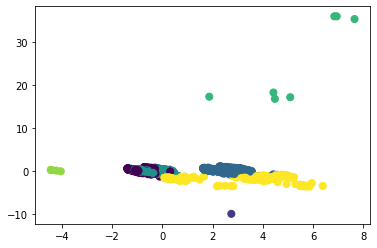

In [109]:
plt.scatter(scores_pca[:, 1], scores_pca[:, 2], c=labels,
            s=50, cmap='viridis');

<H2>KMediods</H2>
<p>We have to reduce the data size for K-mediods because it has O(n)^2. This dataset is very huge (95839, 20). In order to to process it on 4GB (my laptop's RAM), I have to reduce it considerably. 

In [83]:
X= covid.iloc[1:5000, 1:17].values

In [29]:
X.shape

(4999, 16)

In [84]:
scaler = StandardScaler()
covid_std = scaler.fit_transform(X)

In [85]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
pca.fit(covid_std)

PCA(n_components=0.95)

In [86]:
pca.explained_variance_ratio_

array([0.39029242, 0.14478463, 0.07926977, 0.07088365, 0.06268456,
       0.06086052, 0.05752587, 0.05391234, 0.04849447])

Text(0, 0.5, 'Cumulative explained variance')

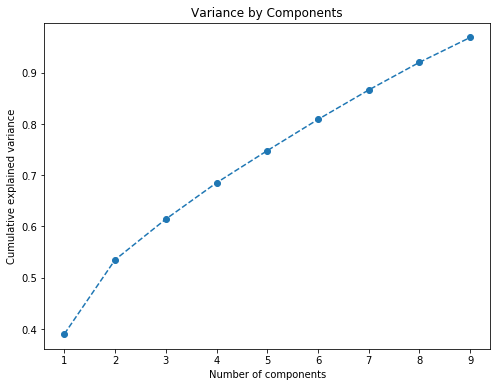

In [88]:
plt.figure(figsize = (8,6))
plt.plot(range(1,10), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Variance by Components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

As we have to preserve 80% of variance, we will retain the 6 components capturing 80% variance. 

In [89]:
pca = PCA(n_components = 6)

In [90]:
pca.fit(covid_std)

PCA(n_components=6)

In [91]:
scores_pca_med = pca.transform(covid_std)

In [92]:
from sklearn_extra.cluster import KMedoids
kmedoids = KMedoids(n_clusters = 3, random_state = 0).fit(scores_pca_med)

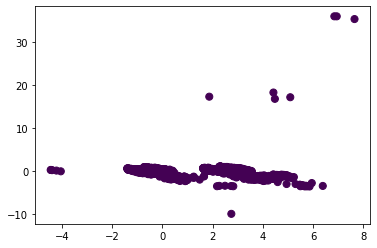

In [96]:
plt.scatter(scores_pca_med[:, 1], scores_pca_med[:, 2], c=kmedoids.labels_,
            s=50, cmap='viridis');